# The Amplitude Estimation Kernel

In this notebook the **Amplitude Estimation Kernel** is introduced. 

## 1. The Amplitude Estimation Problem

The amplitude estimation problem can be defined in the following way:

Let an unitary operator $\mathbf{A}$ that acts upon an initial n-qubits state $|0\rangle_n$ in the following way:

$$|\Psi\rangle = \mathbf{A}|0\rangle_n = \sum_{i=0}^{2^n-1} a_i |i\rangle_n$$

Now we are interested in the sub-state composed by some basis states $J=\{j_0, j_1, \cdots, j_l\}$, so we can write down:

$$|\Psi\rangle = \mathbf{A}|0\rangle_n = \sum_{j \in J} a_j |j\rangle_n + \sum_{i \notin J} a_i |i\rangle_n$$

If we define the sub-states $|\Psi_0\rangle$ and $|\Psi_1\rangle$ as follows:

$$|\Psi_0\rangle = \frac{1}{\sqrt{a}}\sum_{j \in J} a_j |j\rangle_n \;\; and \;\; |\Psi_1\rangle = \frac{1}{\sqrt{1-a}}\sum_{i=0, i \notin J}^{2^n-1} a_i |i\rangle_n$$

The final $|\Psi\rangle$ can be expresed as:

 $$|\Psi\rangle= \mathbf{A}|0\rangle_n  = \sqrt{a} |\Psi_0\rangle  + \sqrt{1-a}|\Psi_1\rangle$$

In the estimation problem we want to estimate the amplitude of $|\Psi_0\rangle$: $a$

## 2. MonteCarlo Solution.

The naive solution (we call **MonteCarlo** solution from now) is measuring the all the qbits $N$ times and get the probability of obtaining the desired state $|\Psi_0\rangle$. In this case the estimator of $a$, $\tilde{a}$ will be:

$$\tilde{a} = P_{|\Psi_0\rangle} = \frac{Number \; of \; times \; |\Psi_0\rangle \; was \; measured}{N}$$


The error $\epsilon_{a}$ of this $\tilde{a}$ estimator can be obtained using the *Chernoff-Hoeffding* bound:

$$P[\tilde{a} \in |a_j-\epsilon_{a}, a_j+\epsilon_{a}|] \geq 2e^{-2 N \epsilon_{a}^2}$$

So if we want $P[\tilde{a} \in |a_j-\epsilon_{a}, a_j+\epsilon_{a}|] \geq \alpha$ ($\alpha \in [0,1]$) then:

$$\epsilon_a^2 \leq \frac{1}{2N}Ln[\frac{2}{\alpha} ]$$

So the error for the estimator $\tilde{a}$ will have the following behaviour with the number of measurements $N$:

$$\epsilon_a \sim \frac{1}{\sqrt{N}}$$

## 3. Amplitude Amplification

In the equation of the final state $|\Psi\rangle$ we can do the following substitution:

$$\sqrt{a} = \sin\left(\theta\right)$$

Now the equation will be:

$$|\Psi\rangle= \mathbf{A}|0\rangle_n  = \sqrt{a} |\Psi_0\rangle  + \sqrt{1-a}|\Psi_1\rangle = \sin\left(\theta\right) |\Psi_0\rangle + \cos\left(\theta\right) |\Psi_1\rangle$$
 
Now we can build a Grover-like operator based on $\mathcal{A}$ following:

$$\mathbf{G}(\mathbf{A}) = \mathbf{A} \left(\hat{I} - 2|0\rangle\langle 0|\right) \mathbf{A}^{\dagger}\left(\hat{I} - 2|\Psi_0\rangle\langle \Psi_0|\right)$$

This  Grover-like operator acts in the following way: 

$$\mathbf{G}^k |\Psi\rangle = \mathbf{G}^k \mathbf{A} |0\rangle_n=  \sin\big((2k+1)\theta\big) |\Psi_0\rangle  + \cos\big((2k+1)\theta\big)|\Psi_1\rangle$$


## 4. Phase Estimation Solution

The canonical Amplitude Estimation uses the *Quantum Phase Estimation* algorithm. The algorithm allocates $m$ ancilla qubits  and apply over $|\Psi\rangle$ geometrically increases powers of $\mathbf{G}$ controlled by the ancillas as shown in the following Figure:

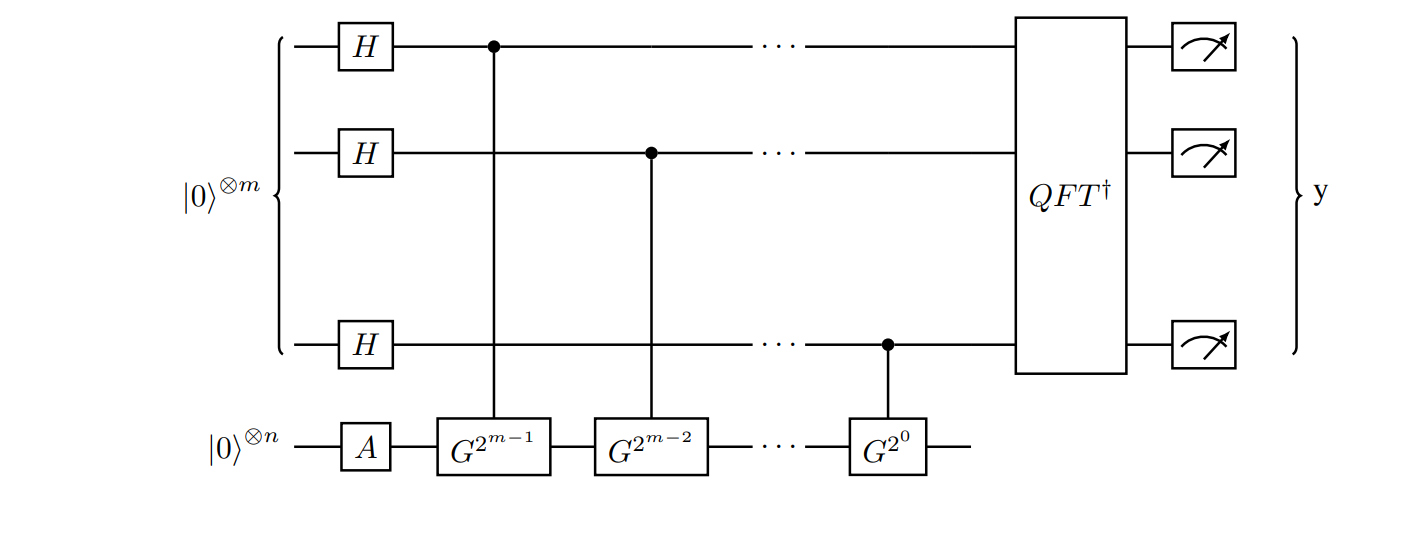


Finally over the ancillas qubits the complex conjugate of the Quantum Fourier Transformation ($QFT^{\dagger}$ in the Figure) is applied and the ancilla qubits are measured generating and integer $y \in \{0,1,...M-1\}$, where $M=2^m$ can be mapped to an angle: $\tilde{\theta} = \frac{y\pi}{2^m}$. In this case the estimation will be: $\tilde{a}=\sin^2(\tilde{\theta})$ with a probability of at least $\frac{8}{\pi^2} \sim 81 \%$

$$\epsilon = |\tilde{a}-a| \leq \frac{2\pi\sqrt{a(1-a)}}{M} + \frac{\pi^2}{M^2}$$

So in this case the error for the estimator $\tilde{a}$ will scale with:


$$\epsilon_a \sim \frac{1}{M}$$

In this case a quadratic speed up over the **MonteCarlo** method is obtained.

## 5. Amplitude Estimation without Phase Estimation


**Phase Estimation** algorithm is computationally expensive and present quantum computers do not have enough quality, nor qubits, to properly implement it. There exists, however, several algorithms that can solve the *Amplitude Estimation* problem without the use of **Phase Estimation** and with scaling errors between **Monte-Carlo** and **Phase estimation**, this is 

$$\frac{1}{N} < \epsilon < \frac{1}{\sqrt{N}} $$

These algorithms are known as *Amplitude Estimation* algorithms. The main idea of these algorithms is to take advantage of the facts:

$$\mathbf{G}^k |\Psi\rangle = \mathbf{G}^k \mathbf{A} |0\rangle_n=  \sin\big((2k+1)\theta\big) |\Psi_0\rangle  + \cos\big((2k+1)\theta\big)|\Psi_1\rangle$$

and in the use of very smart strategies for selecting $k$ in order to maximize the probability of measuring the $|\Psi_0\rangle$:

$$P[|\Psi_0\rangle] = \sin^2\big((2k+1)\theta\big)$$



## 6. About the AE algorithms.

Different **AE** algorithms can be used for solving the **AE** kernel. In the present library, the following ones were implemented:

* Classical Quantum Phase Estimation (**CQPEAE**): based on *Brassard et al (2022). Quantum Amplitude Amplification and Estimation*. This is the presented method in section 4. **Only estimates positives $a$**.
* Iterative Quantum Phase Estimation (**IQPEAE**): based on *Kitaev (1995) Quantum measurements and the Abelian Stabilizer Problem*. The method is similar to **CQPEAE** but the **QFT** is performed using a single qubit. This method generates a circuit with a lower number of qubits but with deeper ones. **Only estimates positives $a$**
* Maximum Likelihood Amplitude Estimation (**MLAE**): based on *Suzuki et al (2020) Amplitude estimation without phase estimation*. In this case direct quantum circuits with different powers of the corresponding Grover operator $\mathbf{G}(\mathbf{A})$ (see section 3) are executed and measured. The different measurements are post-processed using maximum likelihood techniques for getting an estimation of $a$. **Only estimates positives $a$**
* Iterative Quantum Amplitude Estimation (**IQAE**): based on *Grinko et al (2021) Iterative quantum amplitude estimation*. This algorithm uses the  Grover operator $\mathbf{G}(\mathbf{A})$ in an iterative way. In each step a differing number of applications of $\mathbf{G}(\mathbf{A})$ is computed based on the results obtained in the step before. This algorithm returns a $\alpha$ level confidence interval for the estimation of $a$. So algorithm provides a minimum and maximum of $a$. The length of the interval should be fixed a priori. For lower lengths, the algorithm needs more steps and deeper circuits. **Only estimates positives $a$**
* Real Quantum Amplitude Estimation (**RQAE**): based on *Manzano et al (2023) Real Quantum Amplitude Estimation*. An iterative algorithm where in each step the number of applications of the  Grover operator $\mathbf{G}(\mathbf{A})$ is computed using the results from before steps. This algorithm returns a $\alpha$ level confidence interval for the estimation of $a$. So algorithm provides a minimum and maximum of $a$. The length of the interval should be fixed a priori. For lower lengths, the algorithm needs more steps and deeper circuits. **This algorithm allows us to estimate non-positive $a$**.